This exercise uses the Pima Indians Diabetes Database to build different Machine Learning models to  classify whether the patient suffers from Diabetes. The dataset contains 768 instances (768 rows) and 8 features (8 columns) and 1 outcome column (1 = diabetes, 0 = non-diabetes). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_curve,
    auc
)

### Task 1
Conduct an exploratory data analysis (EDA) to get familiar with the dataset and to examine the feature values.

In [2]:
file_path = "diabetes.csv"
df = pd.read_csv(file_path)

# Display Descriptive Statistics
# print(df.shape)
print("Descriptive Statistics of Dataset:\n")
print(df.describe())

Descriptive Statistics of Dataset:

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  

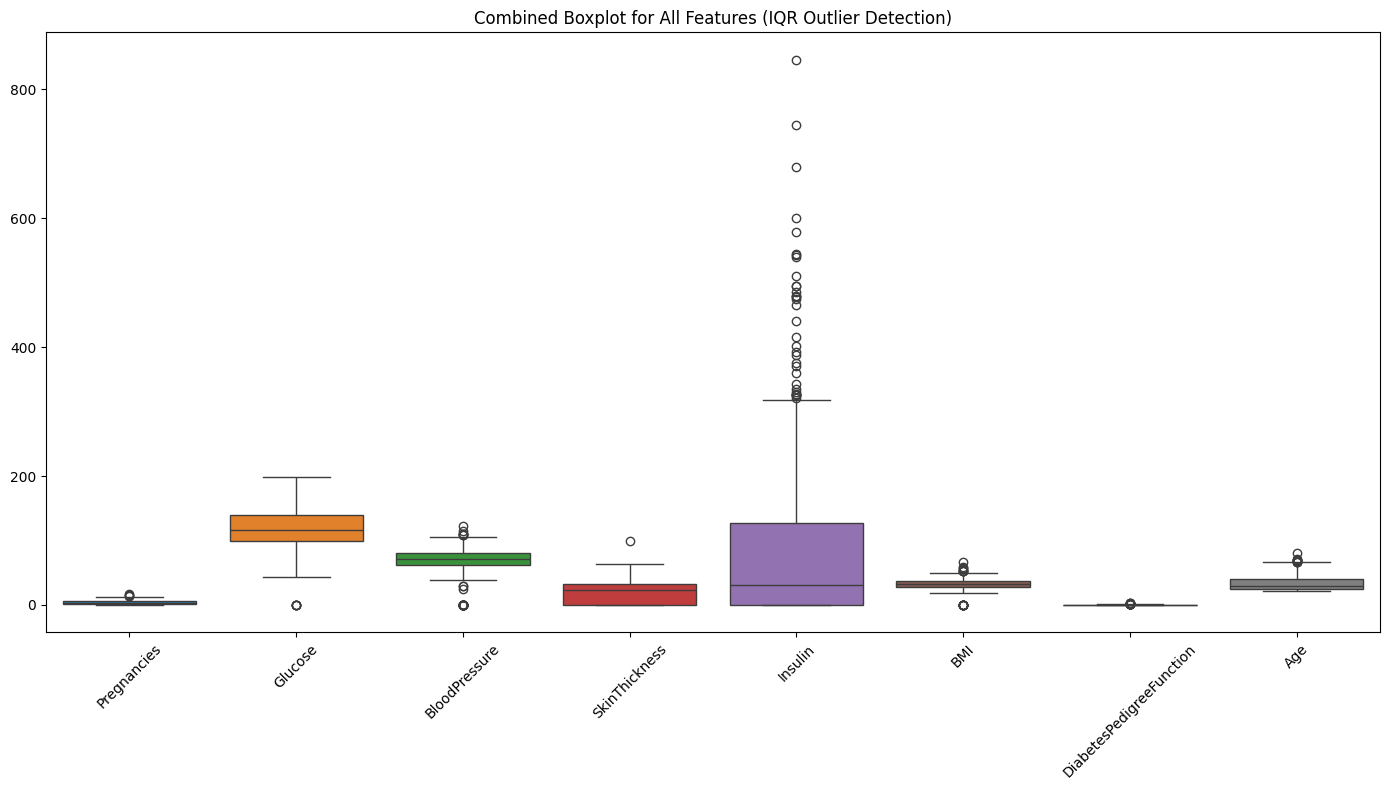

In [3]:
# Boxplot to Identify Outliers (IQR Method. IQR=Q3−Q1, Q3 = 75th percentile, Q1 = 25th percentile)
# Outcome column is excluded
features = df.drop(columns=["Outcome"])

plt.figure(figsize=(14, 8))
sns.boxplot(data=features)
plt.title("Combined Boxplot for All Features (IQR Outlier Detection)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

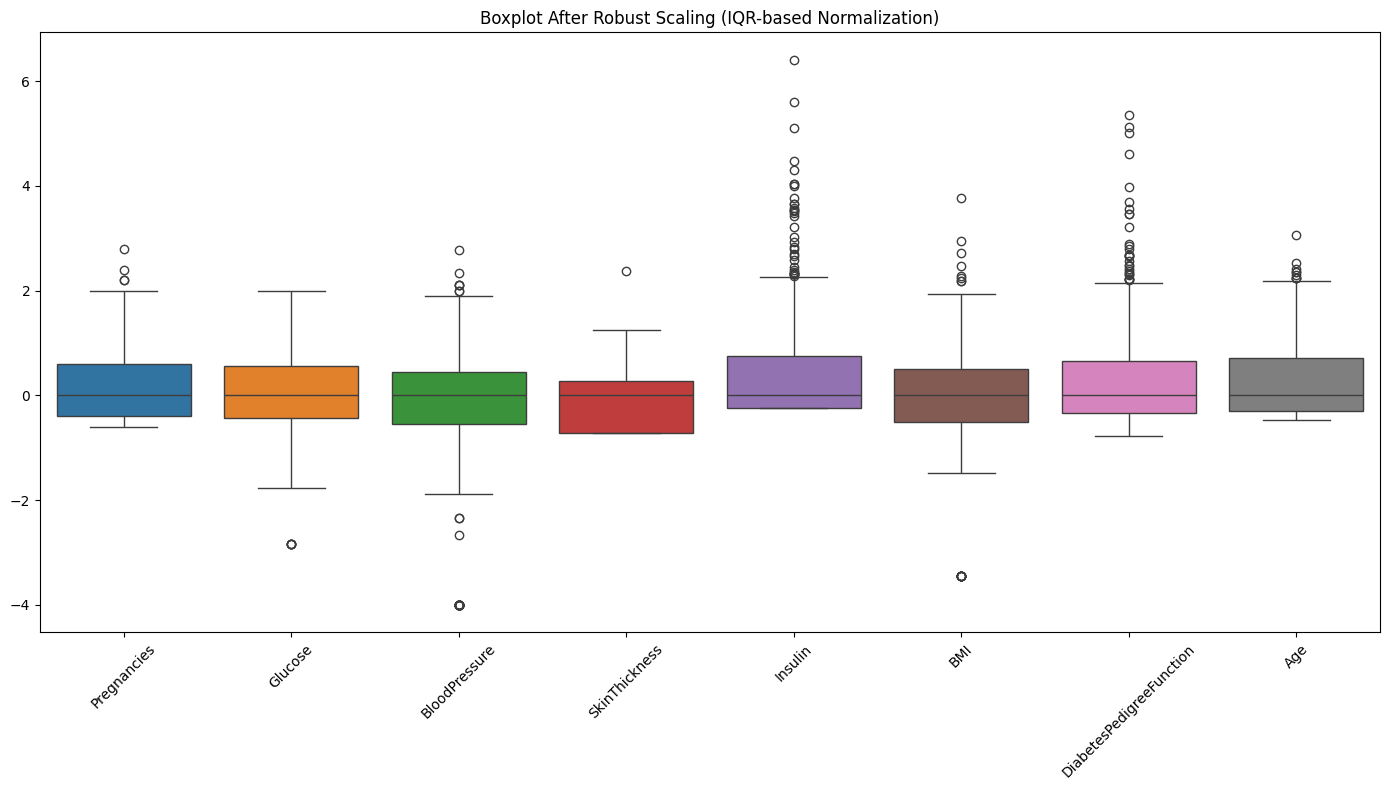

In [4]:
# Normalize Using Robust Scaling (IQR-based), then output boxplot
scaler = RobustScaler()
features_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_scaled)
plt.title("Boxplot After Robust Scaling (IQR-based Normalization)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 2
Split the dataset into training and testing sets. Develop two ML classifier algorithms: Logistic Regression and Random Forest, then fit the classifiers using training data and evaluate their performance using the testing data.

In [5]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Train-Test Split (70/30 with Stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y  # preserves class distribution
)
 

In [ ]:
# PiPELINE FOR LOGISTIC REGRESSION

# Normalization data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train, pay more attention to minority class
log_model = LogisticRegression(random_state=42, class_weight='balanced')
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1] # probability value between 0 and 1

In [ ]:
# PiPELINE FOR RANDOM FOREST

# n_estimators=Number of trees in the forest, Maximum depth of each tree
rf_model = RandomForestClassifier(max_depth=5, n_estimators=100, min_samples_split=8, min_samples_leaf=3, max_features= 
'sqrt', bootstrap= True)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1] # probability value between 0 and 1


Logistic Regression Performance:
Accuracy: 0.7662337662337663
Balanced Accuracy: 0.7546913580246913
Recall (Sensitivity): 0.7160493827160493
Precision: 0.651685393258427


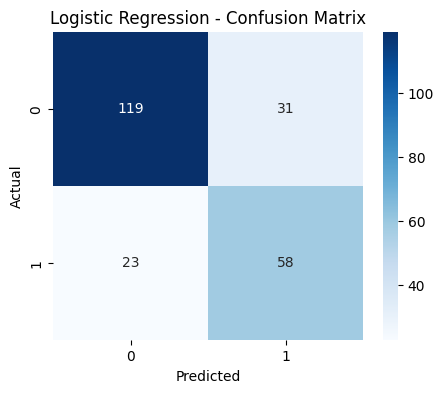

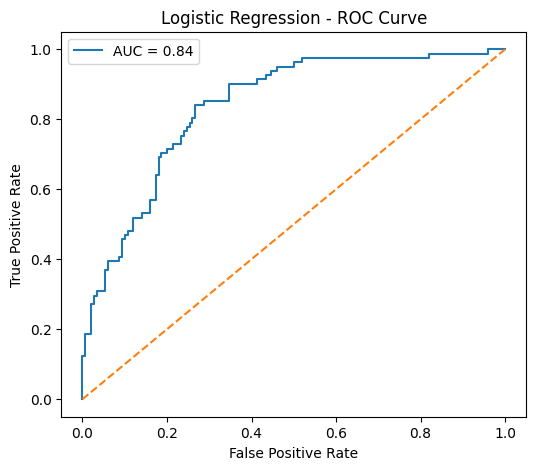


Random Forest Performance:
Accuracy: 0.7445887445887446
Balanced Accuracy: 0.6897530864197531
Recall (Sensitivity): 0.5061728395061729
Precision: 0.6833333333333333


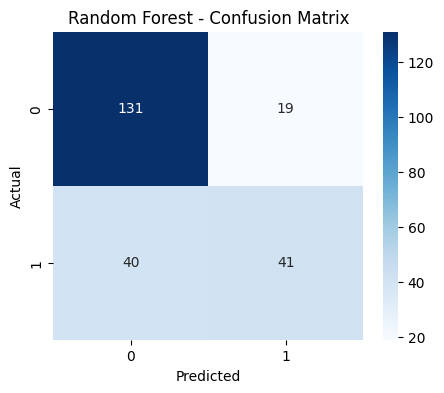

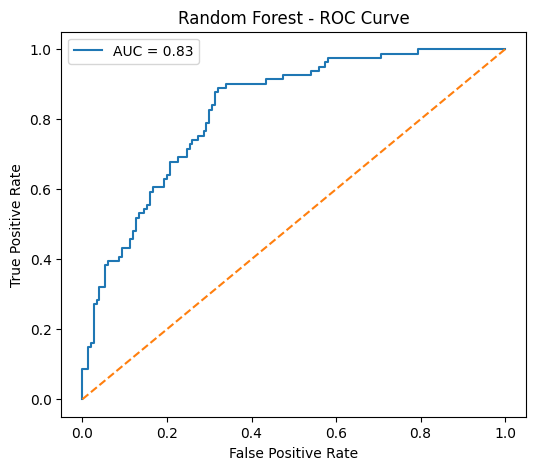

In [8]:
# Evaluate model
def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred)) # Percentage of total predictions the model got right
    print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred)) 
    # balanced accuracy = average of sensitivty and specificity (true negative/all actual negatives)
    print("Recall (Sensitivity):", recall_score(y_test, y_pred)) # True Diabetics/All actual diabetics
    print("Precision:", precision_score(y_test, y_pred)) # True Diabetics/All predicted diabetics
    # Precision also called positive predictive value

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob) # False Positive Rate and True Positive Rate (a.k.a. Sensitivity)
    # FPR (or 1 - specificity) = FP/FP+TN 
    roc_auc = auc(fpr, tpr)
    # Each point on the curve represents a specific decision threshold
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

evaluate_model(y_test, y_pred_log, y_prob_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

### Task 3
Create another Random Forest that handles the target feature imbalance, then evaluate its performance.


Random Forest with class_weight=’balanced’ Performance:
Accuracy: 0.7575757575757576
Balanced Accuracy: 0.7451851851851852
Recall (Sensitivity): 0.7037037037037037
Precision: 0.6404494382022472


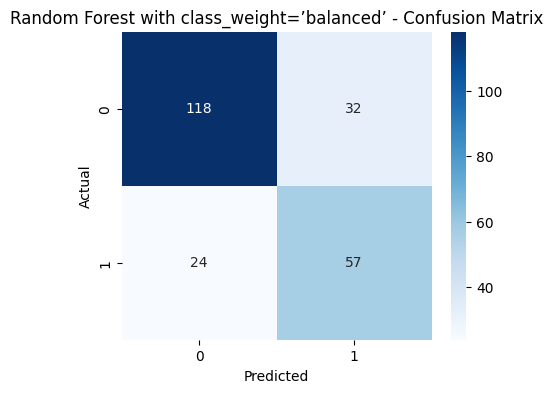

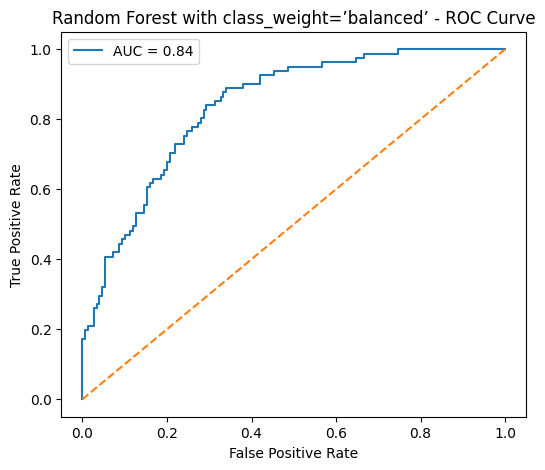

In [9]:
# random forest with balanced class_weight
rf_model_balanced = RandomForestClassifier(max_depth=5, n_estimators=100, min_samples_split=8, min_samples_leaf=3, max_features= 
'sqrt',class_weight='balanced', bootstrap= True)
rf_model_balanced.fit(X_train, y_train)

y_pred_rf_balanced = rf_model_balanced.predict(X_test)
y_prob_rf_balanced = rf_model_balanced.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_rf_balanced, y_prob_rf_balanced, "Random Forest with class_weight=’balanced’")

### Task 4
Use cross-validation to train and evaluate the classifiers.

In [10]:
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_model_cv = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
X_scaled = scaler.fit_transform(X)
cv_results = cross_validate(
    log_model,
    X_scaled,
    y,
    cv=stratified_k_fold,
    scoring=['accuracy', 'balanced_accuracy', 'recall', 'precision'],
    return_train_score=False
)

print("Stratified 5-Fold Cross-Validation Results (Logistic Regression):\n")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean Balanced Accuracy: {cv_results['test_balanced_accuracy'].mean():.4f}")
print(f"Mean Recall (Sensitivity): {cv_results['test_recall'].mean():.4f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.4f}")

Stratified 5-Fold Cross-Validation Results (Logistic Regression):

Mean Accuracy: 0.7408
Mean Balanced Accuracy: 0.7360
Mean Recall (Sensitivity): 0.7199
Mean Precision: 0.6153


### Task 6
Examine how Logistic Regression determines the output by looking at the coefficient for each variables.

In [11]:
LR_coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

LR_coefficients

,Feature,Coefficient
1,Glucose,1.098677
5,BMI,0.705383
0,Pregnancies,0.456941
6,DiabetesPedigreeFunction,0.281602
7,Age,0.140895
3,SkinThickness,-0.060306
4,Insulin,-0.066719
2,BloodPressure,-0.185822


### Task 7
Train a decision trees classifier and calculate its accuracy, sensitivity and precision.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [13]:
tree_clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=8,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42
)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_tree)
sensitivity = recall_score(y_test, y_pred_tree)   # Sensitivity = Recall for positive class
precision = precision_score(y_test, y_pred_tree)

print("Decision Tree Performance:")
print(f"Accuracy:     {accuracy:.4f}")
print(f"Sensitivity:  {sensitivity:.4f}")
print(f"Precision:    {precision:.4f}")

Decision Tree Performance:
Accuracy:     0.7403
Sensitivity:  0.6296
Precision:    0.6296


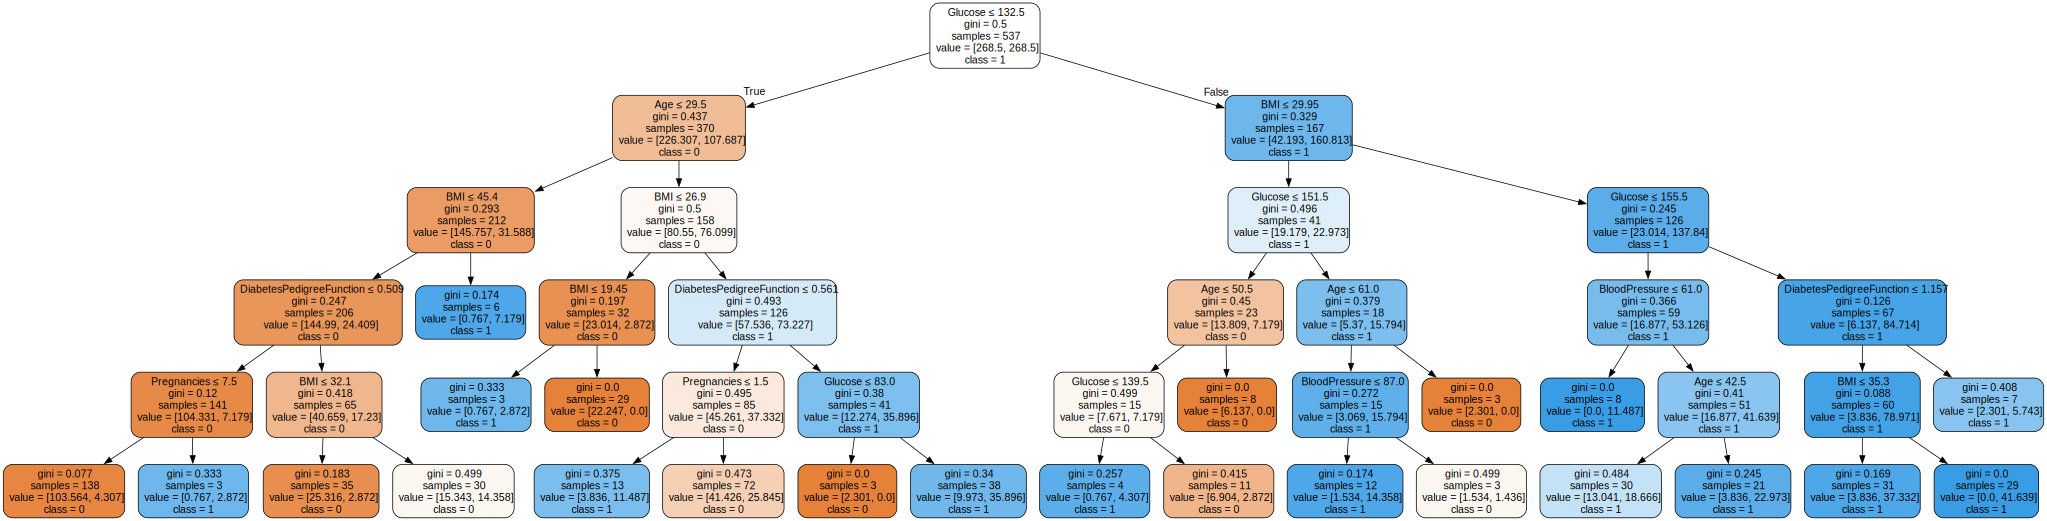

In [14]:
features = X.columns  # feature names from the dataset

dot_data = tree.export_graphviz(
    tree_clf,
    feature_names=features,
    class_names=tree_clf.classes_.astype(str),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

### Task 8
We want to know how the features influence the final classification output. For Random Forest, we can achieve this by obtaining the MDI importance for each feature (the higher the MDI importance, the more important the feature).

In [15]:
scaled_rf = RandomForestClassifier(max_depth=5, n_estimators=100, min_samples_split=8, min_samples_leaf=3,random_state=42
                                   , bootstrap= True)
scaled_rf.fit(X_train_scaled, y_train)

importances = scaled_rf.feature_importances_ 
# measures how much each feature reduces Gini impurity across all trees in the Random Forest
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "MDI Importance": importances
}).sort_values(by="MDI Importance", ascending=False)

print(importance_df)

                    Feature  MDI Importance
1                   Glucose        0.372038
5                       BMI        0.167380
7                       Age        0.120855
0               Pregnancies        0.092938
4                   Insulin        0.079566
6  DiabetesPedigreeFunction        0.076410
2             BloodPressure        0.050902
3             SkinThickness        0.039911


### Task 9
Another explainable AI technique for Random Forest is Feature permutation importance (the higher the more important the feature is). 

In [16]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(
    scaled_rf,     
    X_train_scaled,  
    y_train,
    n_repeats=30,
    random_state=42
)

perm_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance Mean": perm_importance.importances_mean,
    "Importance Std": perm_importance.importances_std
}).sort_values(by="Importance Mean", ascending=False)

print(perm_df)

                    Feature  Importance Mean  Importance Std
1                   Glucose         0.151148        0.013403
5                       BMI         0.047983        0.007303
7                       Age         0.031037        0.005696
0               Pregnancies         0.027685        0.006020
6  DiabetesPedigreeFunction         0.025760        0.005420
4                   Insulin         0.020546        0.005300
2             BloodPressure         0.013284        0.004072
3             SkinThickness         0.012353        0.003313


### Task 10
Partial Dependence Plots (PDP) is an explainable AI technique that is model-agnostic.

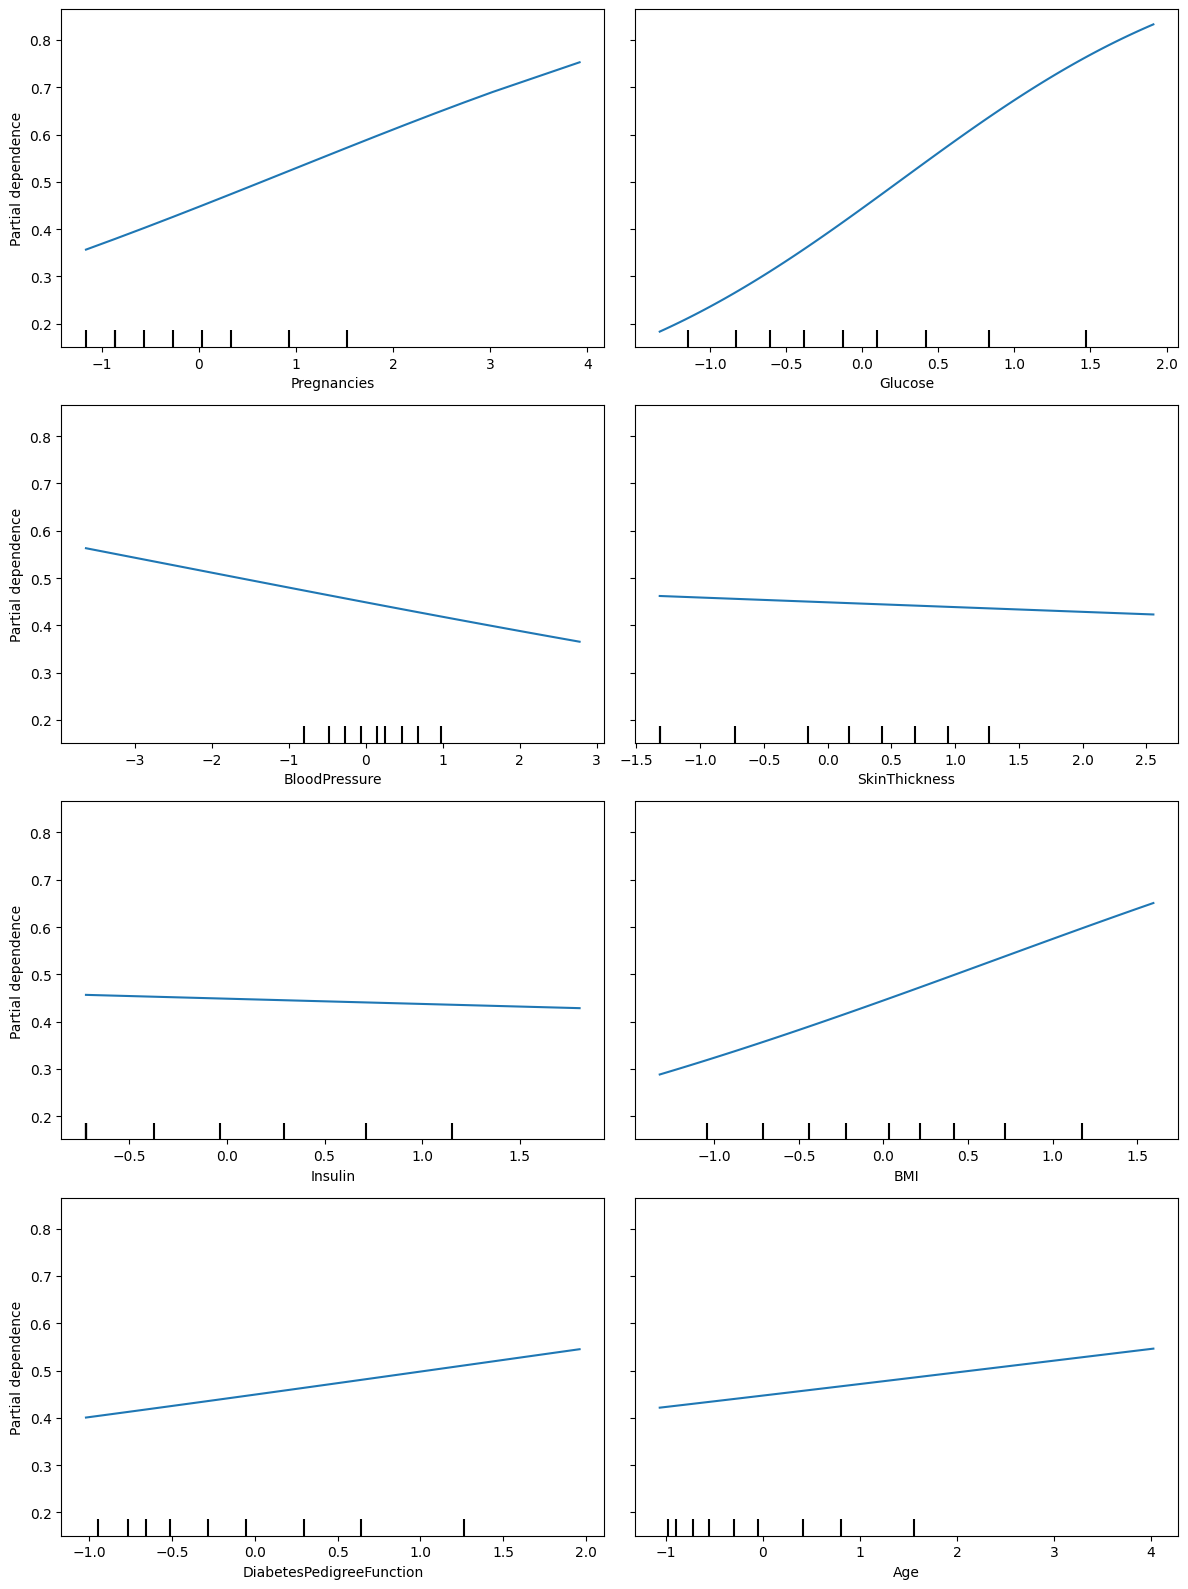

In [19]:
from sklearn.inspection import PartialDependenceDisplay

features = list(X.columns)
fig, ax = plt.subplots(4, 2, figsize=(12, 16))  # 8 plots arranged in 4 rows × 2 columns

PartialDependenceDisplay.from_estimator(
    estimator=log_model,
    X=X_train_scaled,
    features=features,
    feature_names=features,
    kind="average",
    ax=ax
)

plt.tight_layout()
plt.show()